In [1]:
# qiskit_superposition
#Various state can be expressed at the same time by creating superposition.
#In terms of n bits binary number, we can easily make n states by operating Hadamard to all the qubits.  

#What if we want to make n-1 states by n qubits?
#That is no so simple, so my goal is to make an algorithm which enables us to make any kinds of superposition.

import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, execute, Aer
from qiskit.tools.visualization import plot_histogram
import math


Bad key "text.kerning_factor" on line 4 in
E:\DevelopmentEnvironments\Anaconda3\envs\qiskit_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


{'000': 121, '101': 121, '001': 133, '111': 142, '110': 106, '100': 142, '011': 128, '010': 131}


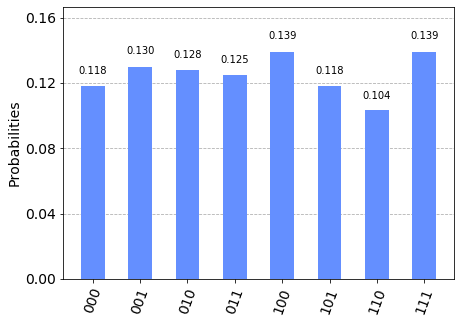

In [2]:
#3 qubits superposition 8 states
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

qc.h(q)

qc.measure(q[0:3], c[0:3])

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

1. ry_arc
2. operate ch and break down the probability until all states' probability get equal

You also will be able to crete another 5 states superposition by operating x gates or  by changing the control qubit of ch gate.

In [22]:
def ry_arc(qubit, num):
    theta = 2 * np.arccos(1 / np.sqrt(num))
    qc.ry(theta, q[qubit])

{'001': 207, '000': 214, '101': 194, '111': 214, '011': 195}


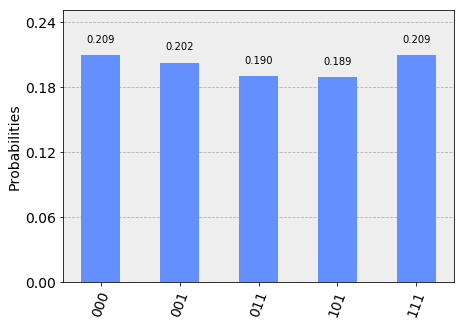

In [24]:
#000, 001, 011, 101, 111
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

ry_arc(0, 5)
qc.ch(q[0], q[1])
qc.ch(q[0], q[2])

qc.measure(q[0:3], c[0:3])

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

{'001': 204, '101': 206, '111': 223, '011': 186, '010': 205}


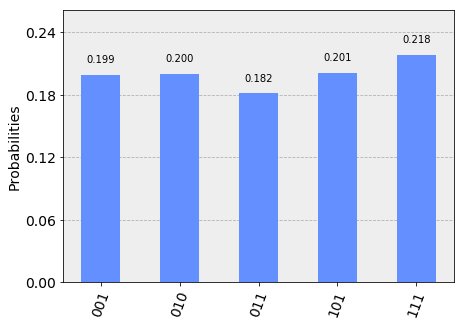

In [25]:
#001, 010, 011, 101, 111
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

ry_arc(0, 5)
qc.ch(q[0], q[1])
qc.ch(q[0], q[2])
qc.x(q[1])

qc.measure(q[0:3], c[0:3])

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

{'000': 236, '111': 194, '100': 193, '110': 204, '010': 197}


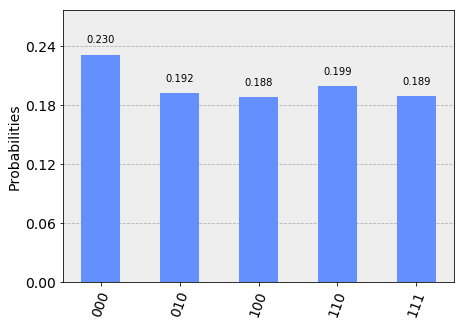

In [26]:
#000, 010, 100, 110, 111
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

ry_arc(0, 5)
qc.ch(q[0], q[1])
qc.ch(q[0], q[2])
qc.x(q[0:3])

qc.measure(q[0:3], c[0:3])

r = execute(qc, Aer.get_backend('qasm_simulator')).result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)